In [47]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from modules import utils, constants

#### The data

In [48]:
test_df = pd.read_csv('../test_dfs/21_jan/dqn_test_df_13000000.csv')
test_df.head()

,index,episode_length,reward,y_pred,y_actual,trajectory,terminated,score,is_success
0,0.0,17.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",0.0,14.0,1.0
1,1.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
2,2.0,19.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,17.0,True
3,3.0,18.0,1.0,1.0,1.0,"['cutaneous_lupus', 'delirium', 'joint_involve...",False,13.0,True
4,4.0,18.0,1.0,0.0,0.0,"['cutaneous_lupus', 'delirium', 'low_c3', 'joi...",False,2.0,True


In [49]:
pathways_df = utils.create_sankey_df(test_df)
pathways_df['Type'] = 'directed'
pathways_df.head()

,Label1,Label2,value,Type
0,cutaneous_lupus,delirium,14000,directed
1,delirium,joint_involvement,2666,directed
2,joint_involvement,low_c3,2666,directed
3,low_c3,non_scarring_alopecia,2847,directed
4,non_scarring_alopecia,fever,3399,directed


In [50]:
len(pathways_df)

322

#### Networkx

In [51]:
import networkx as nx

In [52]:
G = nx.from_pandas_edgelist(pathways_df, source='Label1', target='Label2', edge_attr='value')

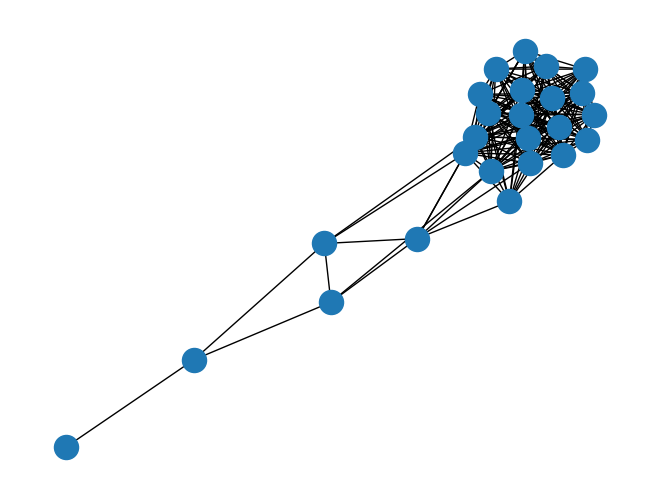

In [53]:
nx.draw(G)

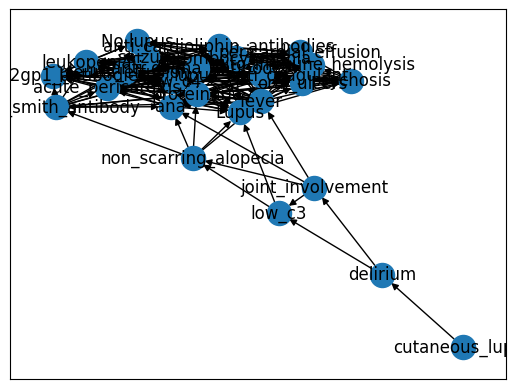

In [55]:
nx.draw_networkx(G, arrows=True)

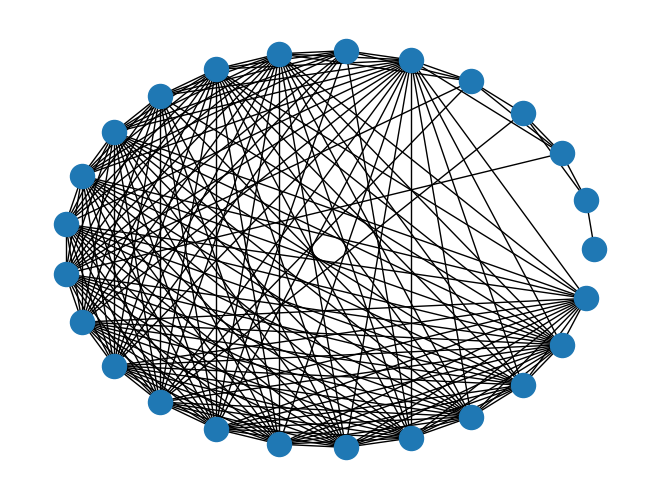

In [13]:
nx.draw_circular(G)

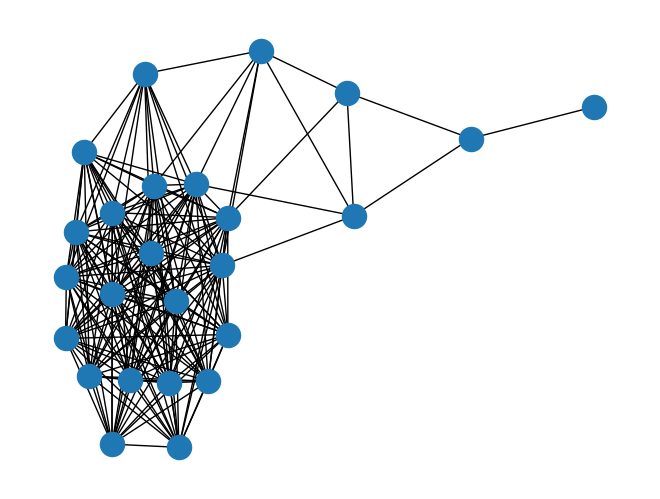

In [14]:
nx.draw_kamada_kawai(G)

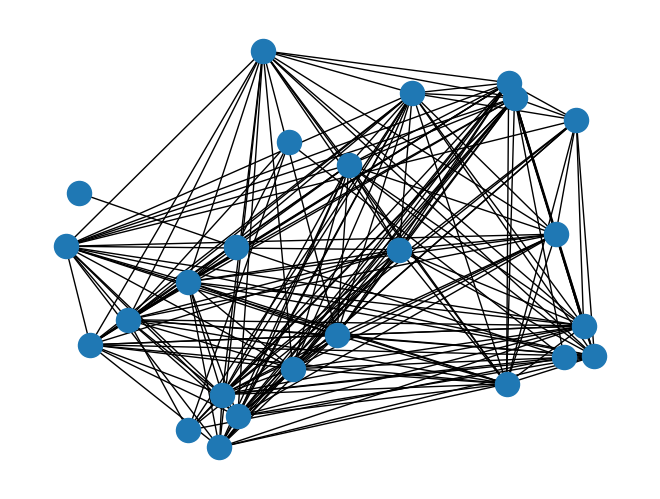

In [15]:
nx.draw_random(G)

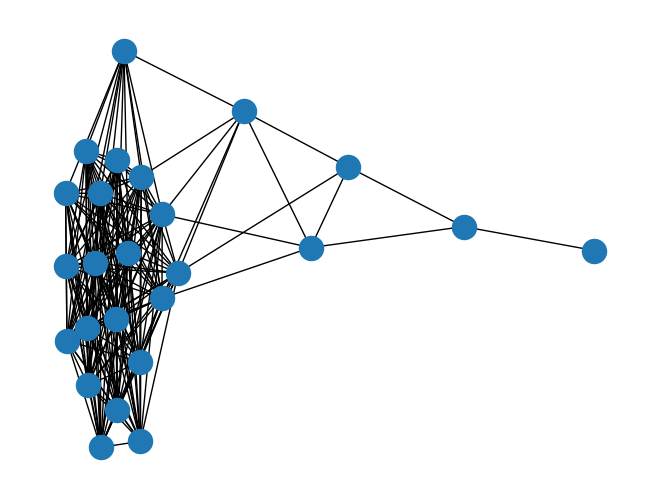

In [16]:
nx.draw_spring(G)

#### pyVis

In [18]:
from pyvis.network import Network

In [19]:
net = Network(notebook=True, cdn_resources='in_line'))
net.from_nx(G)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [22]:
net.show('example.html')